# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Python 📝</p>

<p style="text-align:center">
    <a href="https://github.com/ITHealer?tab=repositories" target="_blank">
    <img src="avatar_healer.jpg" width="200" alt="Logo link github"  />
    </a>
    <b>4251050044 - Ung Minh Hoài</b> <br>
</p>

---
# Bài 2.2.1
## 1. Yêu cầu: Chỉ ra cho người du lịch hành trình với chi phí là ít nhất?

**Input:**
* Dòng đầu chứa số n (1≤n≤20) là số thành phố. 
* n dòng tiếp theo, mỗi dòng chứa n số mô tả mảng C.

**Output:**
* Dòng đầu tiên ghi chi phí ít̉ nhất.
* Dòng thứ hai mô tả hành trình.

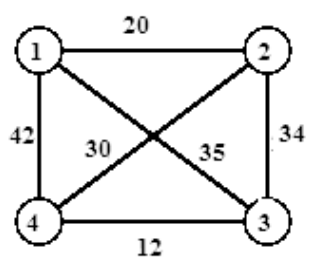

## 2. Code:

### Đọc file 

In [15]:
a = []
def read_file():
    with open('TSPinp.txt', 'r') as f:
        for i in f :
            data = i.split()
            temp_row = []
            for j in data :
                temp = int(j)
                temp_row.append(temp)
            a.append(temp_row)
        f.seek(0)

In [5]:
a

[[4], [0, 20, 35, 42], [20, 0, 34, 30], [35, 34, 0, 12], [42, 30, 12, 0]]

In [16]:
import math
maxsize = float('inf')

# Func sao chép tạm thời
def copyToFinal(curr_path):
    final_path[:N + 1] = curr_path[:]
    final_path[N] = curr_path[0]

# Func tìm chi phí cạnh nhỏ nhất
def firstMin(graph, i):
    min = maxsize
    for k in range(N):
        if graph[i][k] < min and i != k:
            min = graph[i][k]
    return min

# Func tìm chi phí cạnh nhỏ thứ hai
def secondMin(graph, i):
    first, second = maxsize, maxsize
    for j in range(N):
        if i == j:
            continue
        if graph[i][j] <= first:
            second = first
            first = graph[i][j]
        elif(graph[i][j] <= second and
            graph[i][j] != first):
            second = graph[i][j]
    return second

# curr_bound: cận dưới của nút gốc
# curr_weight: lưu trọng số của đường dẫn hiện tại
# level: level hiện tại khi đang di chuyển trong cây không gian tìm kiếm
# curr_path[]: lưu hành trình mà sau này sẽ được sao chép vào final_path[]
def TSPRec(graph, curr_bound, curr_weight, level, curr_path, visited):
    global final_res

    # level == N: đã đi qua tất cả các nút một lần
    if level == N:
        # kiểm tra xem có cạnh nào từ đỉnh cuối cùng trong đường dẫn trở lại đỉnh đầu tiên
        if graph[curr_path[level - 1]][curr_path[0]] != 0:
            # curr_res: tổng trọng số
            curr_res = curr_weight + graph[curr_path[level - 1]]\
                                        [curr_path[0]]
            if curr_res < final_res:
                copyToFinal(curr_path)
                final_res = curr_res
        return

    # Lặp qua các đỉnh
    for i in range(N):
        if (graph[curr_path[level-1]][i] != 0 and visited[i] == False):
            temp = curr_bound
            curr_weight += graph[curr_path[level - 1]][i]

            if level == 1:
                curr_bound -= ((firstMin(graph, curr_path[level - 1]) + firstMin(graph, i)) / 2)
            else:
                curr_bound -= ((secondMin(graph, curr_path[level - 1]) + firstMin(graph, i)) / 2)

            # curr_bound + curr_weight: là cận dưới thực tế cho nút mà chúng ta đã đến.
            if curr_bound + curr_weight < final_res:
                curr_path[level] = i
                visited[i] = True
                
                # gọi TSPRec cho level tiếp theo
                TSPRec(graph, curr_bound, curr_weight, level + 1, curr_path, visited)

            # Nếu không, chúng ta phải cắt bớt nút bằng cách đặt lại tất cả thay đổi đối với curr_weight và curr_bound
            curr_weight -= graph[curr_path[level - 1]][i]
            curr_bound = temp

            # Cũng đặt lại mảng đã truy cập
            visited = [False] * len(visited)
            for j in range(level):
                if curr_path[j] != -1:
                    visited[curr_path[j]] = True

# Func thiết lập final_path
def TSP(graph):
 
    # Khởi tạo các curr_path và mảng đã truy cập
    curr_bound = 0
    curr_path = [-1] * (N + 1)
    visited = [False] * N

    # Tính toán giới hạn ban đầu
    for i in range(N):
        curr_bound += (firstMin(graph, i) + secondMin(graph, i))

    # Làm tròn cận dưới thành số nguyên
    curr_bound = math.ceil(curr_bound / 2)

    # Bắt đầu từ đỉnh 1 nên đỉnh đầu tiên trong curr_path[] là 0
    visited[0] = True
    curr_path[0] = 0

    # Gọi đến TSPRec cho curr_weight bằng 0 và cấp 1
    TSPRec(graph, curr_bound, 0, 1, curr_path, visited)

if __name__ == '__main__':

    # gọi hàm đọc file 
    read_file()
    
    # Số thành phố 
    N = a[0][0]
    
    # mảng đầu vào
    graph = a[1:]
    
    # final_path[] mô tả hành trình
    final_path = [None] * (N + 1)

    visited = [False] * N

    final_res = maxsize

    TSP(graph)

    # hiển thị kết quả
    print("Chi phí ít nhất là: ", final_res)
    print("Hành trình: ", end = ' ')
    for i in range(N + 1):
        print(final_path[i], end = ' ')

Chi phí ít nhất là:  97
Hành trình:  0 1 3 2 0 

### Ghi file

In [18]:
def write_file():
    # Ghi vào file txt
    with open('TSPout.txt', 'w') as wf:
        wf.write(str(final_res) + '\n')
        path = ""
        for i in range(N + 1):
            path = path + str(final_path[i]) + ' '
        wf.write(path)

In [19]:
write_file()

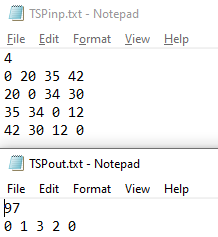

# END

In [20]:
# Nháp
# V = 4
# answer = []

# # Hàm tìm đường đi có trọng số thấp nhất
# def tsp(graph, v, currPos, n, count, cost):
#     if (count == n and graph[currPos][0]):
#         answer.append(cost + graph[currPos][0])
#         return

#     for i in range(n):
#         if (v[i] == False and graph[currPos][i]):
#             # Đánh dấu là đã truy cập
#             v[i] = True
#             tsp(graph, v, i, n, count + 1,
#                 cost + graph[currPos][i])
#             # Đánh dấu nút thứ i là chưa được thăm
#             v[i] = False

# if __name__ == '__main__':
#     n = 4 # số node
    
#     graph= [[ 0, 20, 35, 42 ],
#             [ 20, 0, 34, 30 ],
#             [ 35, 34, 0, 12 ],
#             [ 42, 30, 12, 0 ]]

#     # Mảng Boolean để kiểm tra xem một nút đã được truy cập hay chưa
#     v = [False for i in range(n)]

#     v[0] = True

#     # Find the minimum weight Hamiltonian Cycle
#     tsp(graph, v, 0, n, 1, 0)

#     print(min(answer))


97
